In [1]:
import warnings
import itertools
import os

import numpy as np
from sktime.performance_metrics.forecasting import mean_squared_error, mean_squared_percentage_error
from sktime.forecasting.model_selection import (
    ForecastingRandomizedSearchCV,
    ExpandingWindowSplitter,
)
from sktime.utils.plotting import plot_series

# SARIMAX
from sktime.forecasting.sarimax import SARIMAX
from sktime.forecasting.stream import UpdateEvery

from src.data import load_train_test
from src import get_config, plot_windows, get_rolling_predictions

In [2]:
config = get_config()
train, test = load_train_test(config.processed_data_path)

# Filter train data to use oly data since september 2022
train = train[train.index >= "2022-09-01"]

target_column = str(config.target_station_id)
train_target_series = train[target_column]
test_target_series = test[target_column]

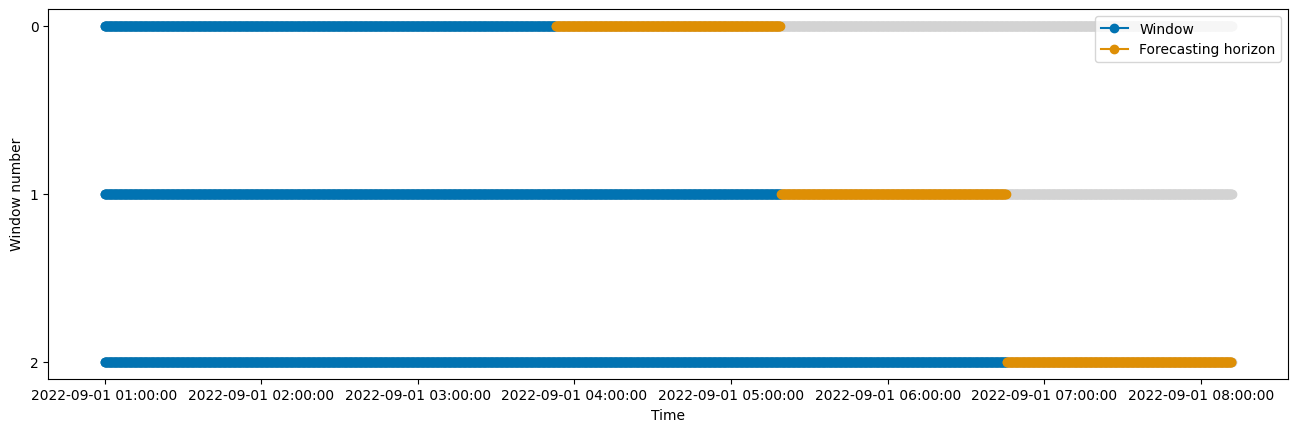

In [11]:
ONE_MONTH = 24 * 30
fh = np.arange(1, ONE_MONTH // 2)
cv = ExpandingWindowSplitter(
    fh=fh,
    initial_window=ONE_MONTH,
    step_length=ONE_MONTH // 2,
)
plot_windows(cv, train_target_series)

In [8]:
possible_p_values = [
    0,
    1,
    2,
    3,
    4
]
possible_i_values = [0]
possible_q_values = [1, 2, 3]
possible_P_values = [0, 1, 2, 3]
possible_I_values = [0]
possible_Q_values = [1, 2]
possible_s_values = [24]

possible_orders = [
    (p, i, q)
    for p in possible_p_values
    for i in possible_i_values
    for q in possible_q_values
]
possible_seasonal_orders = [
    (P, I, Q, s)
    for P in possible_P_values
    for I in possible_I_values
    for Q in possible_Q_values
    for s in possible_s_values
]


PARAMETER_GRID = {
    "order": possible_orders,
    "seasonal_order": possible_seasonal_orders,
}

forecaster = ForecastingRandomizedSearchCV(
    SARIMAX(enforce_invertibility=False, enforce_stationarity=False),
    cv=cv,
    n_iter=10,
    param_distributions=PARAMETER_GRID,
    strategy="no-update_params",
    n_jobs=-1,
    scoring=mean_squared_error,
    verbose=4,
    refit=False,
)

In [9]:
warnings.filterwarnings("ignore")
forecaster.fit(train_target_series)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.05349D+00    |proj g|=  1.60893D+00


 This problem is unconstrained.



At iterate    5    f=  2.45073D+00    |proj g|=  3.88208D-02

At iterate   10    f=  2.44136D+00    |proj g|=  2.60276D-02

At iterate   15    f=  2.44119D+00    |proj g|=  3.54210D-03

At iterate   20    f=  2.44111D+00    |proj g|=  1.03699D-02

At iterate   25    f=  2.44104D+00    |proj g|=  5.42784D-04

At iterate   30    f=  2.44102D+00    |proj g|=  3.69248D-03

At iterate   35    f=  2.44049D+00    |proj g|=  2.71586D-02

At iterate   40    f=  2.44020D+00    |proj g|=  7.96036D-03

At iterate   45    f=  2.43940D+00    |proj g|=  1.57792D-02

At iterate   50    f=  2.43815D+00    |proj g|=  3.62070D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/alvaro/.cache/pypoetry/virtualenvs/src-mLTLYYfc-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ForecastingRandomizedSearchCV(cv=ExpandingWindowSplitter(fh=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  9...
                                                             (3, 0, 1),
                                                             (3, 0, 2),
                                                             (3, 0, 3),
                                                             (4, 0, 1),
                                                             (4, 0, 2),
                                                             (4, 0, 3)],
                                                   'seasonal_order': [(0, 0, 1,
                                                                       24),
                                                                      (0, 0, 1,
                                                                       168),
                                                                      (0, 0, 2,
                                                                       24),
                                                                      (0, 0, 2,
                                                                       168),
                                                                      (1, 0, 1,
                                                                       24),
                                                                      (1, 0, 1,
                                                                       168),
                                                                      (1, 0, 2,
                                                                       24),
                                                                      (1, 0, 2,
                                                                       168),
                                                                      (2, 0, 1,
                                                                       24),
                                                                      (2, 0, 1,
                                                                       168),
                                                                      (2, 0, 2,
                                                                       24),
                                                                      (2, 0, 2,
                                                                       168),
                                                                      (3, 0, 1,
                                                                       24),
                                                                      (3, 0, 1,
                                                                       168),
                                                                      (3, 0, 2,
                                                                       24),
                                                                      (3, 0, 2,
                                                                       168)]},
                              refit=False,
                              scoring=<function mean_squared_error at 0x7f55be855da0>,
                              strategy='no-update_params', verbose=4)

In [10]:
fh = np.arange(1, 24)
best_model = SARIMAX(**forecaster.best_params_)
best_model = UpdateEvery(best_model, step_)
best_model.fit(train_target_series, fh=fh)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23179D+00    |proj g|=  1.39368D+00


 This problem is unconstrained.



At iterate    5    f=  2.63026D+00    |proj g|=  1.68470D-01

At iterate   10    f=  2.59840D+00    |proj g|=  3.76563D-02

At iterate   15    f=  2.59600D+00    |proj g|=  1.01685D-03

At iterate   20    f=  2.59583D+00    |proj g|=  6.43890D-03

At iterate   25    f=  2.59485D+00    |proj g|=  1.90144D-02

At iterate   30    f=  2.59403D+00    |proj g|=  2.51525D-02

At iterate   35    f=  2.59270D+00    |proj g|=  2.89844D-02

At iterate   40    f=  2.59201D+00    |proj g|=  8.67391D-03

At iterate   45    f=  2.59183D+00    |proj g|=  1.10470D-02

At iterate   50    f=  2.59173D+00    |proj g|=  2.97903D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

UpdateEvery(forecaster=SARIMAX(order=(3, 0, 2), seasonal_order=(2, 0, 1, 24)),
            update_interval=24)

In [11]:
predictions = best_model.update_predict(
    test_target_series, update_params=False
)
predictions

2022-11-15 01:00:00    5.384608
2022-11-15 02:00:00    5.441345
2022-11-15 03:00:00    6.176370
2022-11-15 04:00:00    6.153232
2022-11-15 05:00:00    6.146581
                         ...   
2022-12-31 19:00:00    9.769709
2022-12-31 20:00:00    8.105489
2022-12-31 21:00:00    4.494405
2022-12-31 22:00:00    3.922053
2022-12-31 23:00:00    3.751548
Freq: H, Name: 90, Length: 1127, dtype: float64

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ocupación'>)

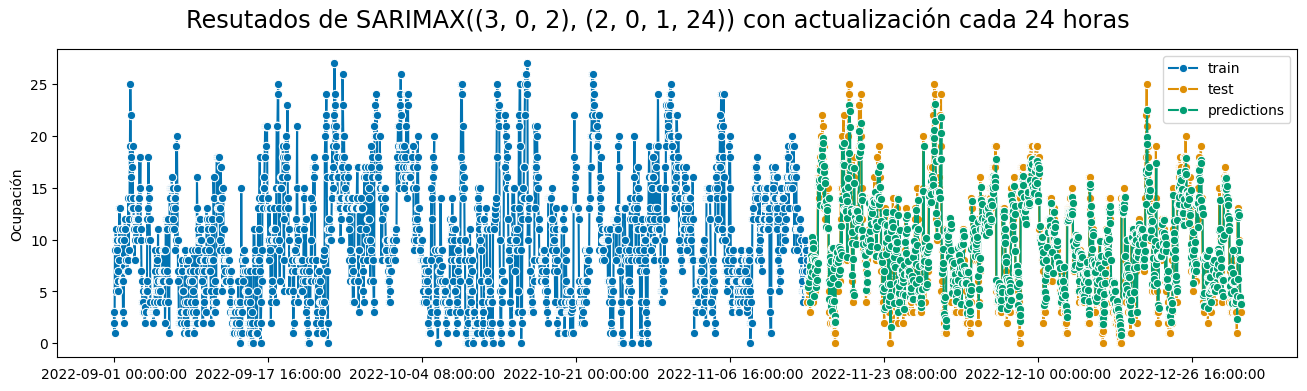

In [12]:
best_params = forecaster.best_params_
title = f"Resutados de SARIMAX({best_params['order']}, {best_params['seasonal_order']}) con actualización cada 24 horas"
plot_series(train_target_series, test_target_series, predictions, labels=["train", "test", "predictions"], title=title, y_label="Ocupación")

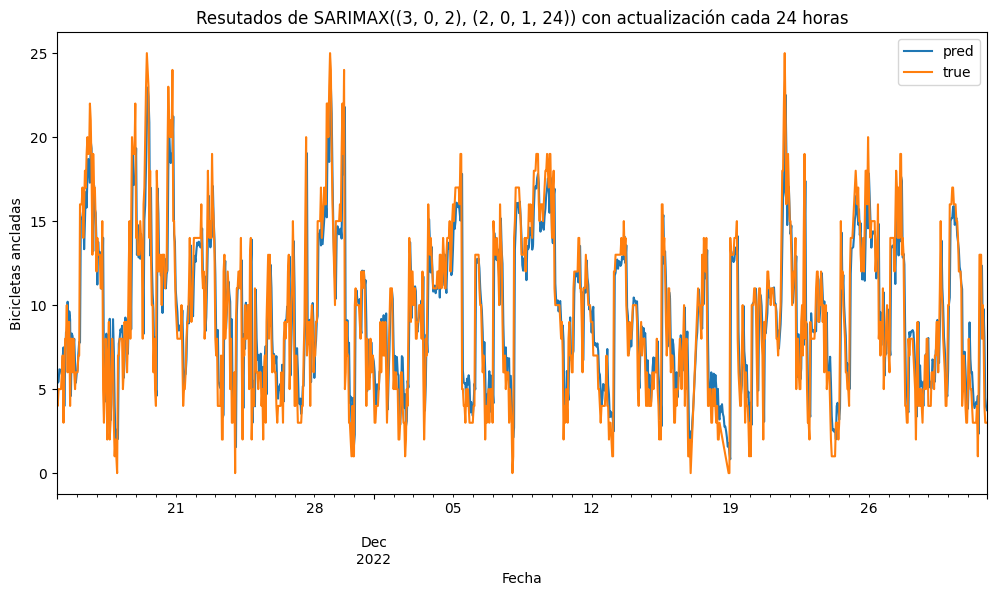

In [16]:
from src.visualization import plot_pred_vs_actual

plot_pred_vs_actual(predictions, test_target_series[:-1], title=title)

In [14]:
mean_squared_error(test_target_series[:-1], predictions)

0.7602019121980624